In [104]:
# Imports
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack  # To stack sparse matrices horizontally
import matplotlib.pyplot as plt

In [105]:
data = pd.read_csv('phish.csv')
data = data.dropna(subset=['text', 'PHISH-GT'])
data.head()

,Unnamed: 0,text,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,phish,unsolicited,work
0,42,Please take a look at the attached and give me...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,44,"Rod,\nI wanted to forward this to you. Arthur...",0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,45,\nI confirmed that since Enron does not deviat...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,46,Good afternoon.\n\nI wanted to forward you one...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,47,Kim:\n\nHere is a summary of the structure we ...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [106]:
# Predicting 'PHISH-GT' based on 'text'

In [107]:
X = data['text']
y = data['PHISH-GT']

# Split data into training and testing sets
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)


In [108]:
# Vectorize the text data with TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

In [109]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train_text)

# Predict the test set results
y_pred_text = model.predict(X_test_tfidf)

In [111]:
# Calculate accuracy
accuracy = accuracy_score(y_test_text, y_pred_text)
print(f"Accuracy of predicting 'PHISH-GT' based on 'text': {accuracy:.2f}")

# Calculate precision and recall for the model
precision_text, recall_text, thresholds_text = precision_recall_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
pr_auc = auc(recall, precision)

Accuracy of predicting 'PHISH-GT' based on 'text': 0.98


In [112]:
# Predicting 'PHISH-GT' based on 12 noisy labels

In [113]:
X_binary = data[['billing', 'account', 'generic', 'attachment', 'typos', 'click-link', 'grammar', 
                 'login', 'urgency', 'phish', 'unsolicited', 'work']]
y_binary = data['PHISH-GT']

In [114]:
# Split data into training and testing sets for binary data
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, train_size=0.8, random_state=42)


In [116]:
# Initialize and train the Logistic Regression model for binary data
model_binary = LogisticRegression()
model_binary.fit(X_train_binary, y_train_binary)

# Predict the test set results
y_pred_binary = model_binary.predict(X_test_binary)

# Calculate accuracy for the binary model
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy of predicting 'PHISH-GT' based on 12 noisy labels: {accuracy_binary:.2f}")

# Calculate precision and recall for the binary model
precision_binary, recall_binary, _ = precision_recall_curve(y_test_binary, model_binary.predict_proba(X_test_binary)[:, 1])
pr_auc_binary = auc(recall_binary, precision_binary)

Accuracy of predicting 'PHISH-GT' based on 12 noisy labels: 0.94


In [117]:
# Predicting 'PHISH-GT' based on BOTH 'text' and 12 noisy labels

In [118]:
# Split data into text, binary features and target
X_text = data['text']
X_binary = data[['billing', 'account', 'generic', 'attachment', 'typos', 'click-link', 'grammar', 'login', 'urgency', 'phish', 'unsolicited', 'work']]
y = data['PHISH-GT']

In [119]:
# Split data into training and testing sets
X_train_text, X_test_text, X_train_binary, X_test_binary, y_train, y_test = train_test_split(X_text, X_binary, y, test_size=0.2, train_size=0.8, random_state=42)

In [120]:
# Vectorize the text data with TF-IDF
vectorizer = TfidfVectorizer()
X_train_text_tfidf = vectorizer.fit_transform(X_train_text)
X_test_text_tfidf = vectorizer.transform(X_test_text)

# Combine text TF-IDF features and binary features
X_train_combined = hstack([X_train_text_tfidf, X_train_binary])
X_test_combined = hstack([X_test_text_tfidf, X_test_binary])

# Initialize and train the Logistic Regression model with combined data
combined_model = LogisticRegression()
combined_model.fit(X_train_combined, y_train)

# Predict the test set results and calculate accuracy
y_pred_combined = combined_model.predict(X_test_combined)
accuracy_combined = accuracy_score(y_test, y_pred_combined)
print(f"Accuracy of Predicting 'PHISH-GT' based on BOTH 'text' and 12 noisy labels: {accuracy_combined:.2f}")

# Calculate precision and recall for the combined model
precision_combined, recall_combined, _ = precision_recall_curve(y_test, combined_model.predict_proba(X_test_combined)[:, 1])
pr_auc_combined = auc(recall_combined, precision_combined)

Accuracy of Predicting 'PHISH-GT' based on BOTH 'text' and 12 noisy labels: 0.97


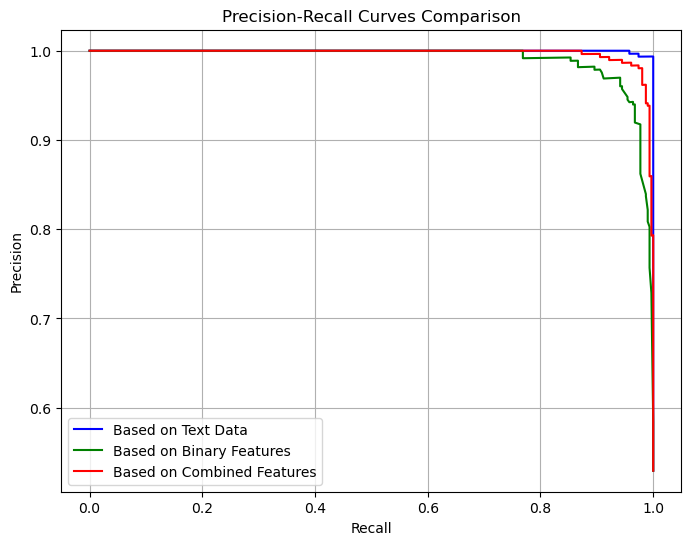

In [121]:
# Plotting Precision-Recall curve
plt.figure(figsize=(8, 6))

# Plot for the text-based model
plt.plot(recall_text, precision_text, color='blue', label='Based on Text Data')

# Plot for the binary features model
plt.plot(recall_binary, precision_binary, color='green', label='Based on Binary Features')

# Plot for the combined features model
plt.plot(recall_combined, precision_combined, color='red', label='Based on Combined Features')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Comparison')
plt.legend(loc='best')
plt.grid(True)
plt.show()
  
